Brenden Nelson

ID: 1000075551

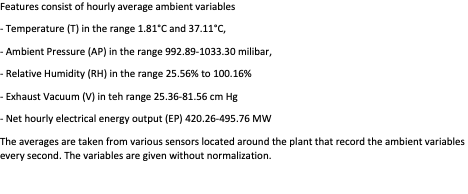

In [ ]:
import pandas as pd
import numpy as np

# data comes in as 1 column with values serperated (data1;data2;data3;ect...)
# split into seperate columns & renamed to work with easier with 'sep=';'
data = pd.read_csv('/content/combined_cycle_power_plant.csv', sep = ';', on_bad_lines='skip')
print(data.shape)
data

(9568, 5)


,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [ ]:
# Generally describing the Dataset
l = len(data)
data.describe()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
# Checking for total number of duplicate values
duplicates = l - len(data.drop_duplicates())
print("There are %d duplicate rows in our dataset" %duplicates)

There are 41 duplicate rows in our dataset


In [ ]:
# Checking for null values
data.isna().sum()

temperature          0
exhaust_vacuum       0
ambient_pressure     0
relative_humidity    0
energy_output        0
dtype: int64

In [ ]:
# displaying some more generic information about the dataset
# All columns are of type 'float64'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   ambient_pressure   9568 non-null   float64
 3   relative_humidity  9568 non-null   float64
 4   energy_output      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
# In this cell I will print out all of the bivariate correlation relative to energy output

data.corr()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
ambient_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
relative_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_output,-0.948128,-0.869780,0.518429,0.389794,1.000000


I can see from the cell above that energy output is highly correlated with both temperature and exhaust vacuum. Temperature has a correlation of -0.95 which is very strongly significant negative correlation. Exhaust vacuum has a correlation of -0.87 which is also a very strong negative correlation. 

Ambient pressure has a medium positive correlation with energy output and relative humidity has a medium-low positive correlation with energy output.

Correlation determines which variables are dependent on each other and to what extent which tells us that there is a strong dependance on the temperature and exhaust vacuum variables when determining the energy output variable. As the temperature or exhaust_vacuum values decrease, the energy output will increase and vice versa.

In [ ]:
# Here I am just displaying the total variance for every column
data.var()

temperature           55.539357
exhaust_vacuum       161.490544
ambient_pressure      35.269152
relative_humidity    213.167848
energy_output        291.282318
dtype: float64

In [ ]:
# Further analysis of the dataset

# Begin by normalizing all data by subtracting each data point by the minimum value in that column and then divide by the range of the column
# This normalization is useful because it forces every data point to take a value between 0 and 1. 
# 0 means that the value is the minimum value. 1 means value is maximum value. 
# The range between 0&1 will show how close to the min or max value of the column each individual data point is

normalized_data = (data - data.min()) / (data.max() - data.min())
normalized_data

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,0.220397,0.234875,0.596882,0.463003,0.808477
1,0.289802,0.302135,0.663945,0.926408,0.597351
2,0.341643,0.350890,0.780252,0.752413,0.598940
3,0.337394,0.514947,0.618659,0.717426,0.619735
4,0.377620,0.432028,0.764415,0.662735,0.573775
...,...,...,...,...,...
9563,0.433144,0.432918,0.312794,0.754155,0.490861
9564,0.649292,0.711388,0.557535,0.365147,0.353113
9565,0.811048,0.549466,0.304380,0.411260,0.120265
9566,0.600283,0.724021,0.685969,0.733646,0.017351


In [ ]:
normalized_data.describe()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,0.505417,0.515050,0.504060,0.640067,0.451722
std,0.211118,0.226119,0.146963,0.195714,0.226053
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.331445,0.291459,0.401138,0.506267,0.258146
50%,0.525071,0.475445,0.496164,0.662399,0.414437
75%,0.677337,0.732740,0.603069,0.794504,0.638013
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
normalized_data.corr()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
ambient_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
relative_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_output,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [ ]:
normalized_data.var()

temperature          0.044571
exhaust_vacuum       0.051130
ambient_pressure     0.021598
relative_humidity    0.038304
energy_output        0.051100
dtype: float64

In [ ]:
from math import ceil

# Take the bottom 25% of data points (with energy output) and label them as bad
# Take the top 25% of data points (with energy output) and label them as good
# The middle 50% of the data can be interpreted as mid and can be dropped for now

data = data.sort_values(by='energy_output',ascending=False)
bad_data = data.tail(ceil(9568*.25))

good_data = data.head(ceil(9568*.25))
good_data.head()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
4487,5.48,40.07,1019.63,65.62,495.76
3303,5.15,40.07,1012.27,63.31,495.35
5285,5.41,40.07,1019.16,64.77,495.24
9278,5.25,40.07,1019.48,67.70,495.23
5118,6.17,40.07,1013.70,58.99,495.21


In [ ]:
bad_data.head()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
4363,32.43,68.31,1010.09,42.22,439.75
8815,28.34,63.77,1013.70,61.13,439.75
9269,28.78,60.07,1014.54,49.03,439.74
7873,28.60,61.86,1011.86,62.13,439.74
1426,27.99,66.91,1008.47,59.63,439.74
